# Simple Linear Regression  Task 1: Prediction using supervised ML


In this task we will be predicting the percentage of a student based on the no. of study hours. 
This is a simple regression problem involving two variables. 

# Author: Parth Saxena

In [1]:
# Importing all libraries required in this notebook
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data1 = pd.read_csv(url)
print("Data imported successfully")
#now printing the first 15 entries in the data to verify that data has been imported successfully
data1.head(15)

Data imported successfully


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


*Now we will check for null values in the dataset*

In [3]:
data1.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


*So there are no null values in this dataset and hence no data cleaning required.*

*Now we will plot the dataset on a 2D plot to see if any relationship between the data is visible graphically.*


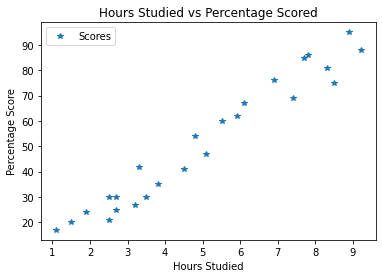

In [4]:
# Plotting the distribution of scores
data1.plot(x='Hours', y='Scores', style='*')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*From this graph, it is clearly visible that there exists a  positive linear relation between the number of hours studied and percentage scored.*

*As a nextstep we will divide our dataset into input and output variable*

In [5]:
X = data1.iloc[:, :-1].values #Attributes 
y = data1.iloc[:, 1].values  #Labels

*Next step is splitting the dataset into training and test set which will be done using Scikit-Learn's built-in train_test_split() method*

In [6]:
#Splitting our dataset using 80:20 rule
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [7]:
print("shape of X_train:", X_train.shape)
print("shape of X_test:", X_test.shape)
print("shape of y_train:", y_train.shape)
print("shape of y_test:", y_test.shape)

shape of X_train: (20, 1)
shape of X_test: (5, 1)
shape of y_train: (20,)
shape of y_test: (5,)


# Training the Algorithm


In [8]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

print("Completed Training.")

Completed Training.


In [9]:
#finding coefficient and intercept of regression line
print("Coefficient of regression line :",regressor.coef_)
print("Intercept of regression line:", regressor.intercept_)

Coefficient of regression line : [9.91065648]
Intercept of regression line: 2.018160041434683


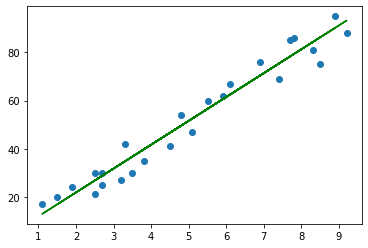

In [10]:
# Plotting the regression line
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line, color='green');
plt.show()

# Making Predictions


In [11]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [13]:
#Training and test score
print("Train Score:", regressor.score(X_train,y_train))
print("Test Score:", regressor.score(X_test,y_test))

Train Score: 0.9515510725211552
Test Score: 0.9454906892105356


# Testing with our own data

In [14]:
hours = 9.25
test_array = np.array([hours])
test_array = test_array.reshape(-1,1)
own_pred = regressor.predict(test_array)
print("No of Hours Studied = {}".format(hours))
print("Predicted  Percentage Score = {}".format(own_pred[0]))

No of Hours Studied = 9.25
Predicted  Percentage Score = 93.69173248737538


# Evaluating the model
There are many metrics to evaluate the performance of a model. Here we have used Mean Squared Error, Mean Absolute Error and R-Squared Value

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score 
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Erroe:', mean_squared_error(y_test,y_pred))
print('R-Squared Value:', r2_score(y_test,y_pred))

Mean Absolute Error: 4.183859899002975
Mean Squared Erroe: 21.5987693072174
R-Squared Value: 0.9454906892105356


# Final Result
So the result obtained is that if a student studies for 9.25 hrs/day then his predicted percentage score is 93.69173248737538 percent 